Comparison of vertical velocities at a fixed depth (CNT)
==

In [1]:
#KRM

import numpy as np

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors

from math import *

import scipy.io

import scipy as spy

%matplotlib inline

from netCDF4 import Dataset

import pylab as pl

import os 

import sys

import seaborn as sns

In [2]:
lib_path = os.path.abspath('/ocean/kramosmu/Building_canyon/BuildCanyon/PythonModulesMITgcm') # Add absolute path to my python scripts
sys.path.append(lib_path)

import ReadOutTools_MITgcm as rout 

import ShelfBreakTools_MITgcm as sb


In [3]:
# Functions
def vertTrans(Mask, W,zlim=30):
    mask_expand = np.expand_dims(Mask[zlim,180:267,:],0)
    mask_expand = mask_expand + np.zeros(W[:,zlim,180:267,:].shape)

    vert = W[:,zlim,180:267,:]
    VertTrans= np.sum(np.sum(np.ma.masked_array(vert,mask = mask_expand),axis=1),axis=1)
    return VertTrans


In [4]:
#Base case, iso =1 , No 3d diff.
CanyonGrid='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/gridGlob.nc'
CanyonGridOut = Dataset(CanyonGrid)
#for dimobj in CanyonGridOut.variables.values():
#    print dimobj
CanyonState='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/stateGlob.nc'
CanyonStateOut = Dataset(CanyonState)



In [5]:
# General input
nx = 360
ny = 360
nz = 90
nt = 19 # t dimension size 

z = CanyonStateOut.variables['Z']
#print(z[10])
Time = CanyonStateOut.variables['T']
#print(Time[:])

xc = rout.getField(CanyonGrid, 'XC') # x coords tracer cells

yc = rout.getField(CanyonGrid, 'YC') # y coords tracer cells
rc =  CanyonGridOut.variables['RC'] # y coords tracer cells

bathy = rout.getField(CanyonGrid, 'Depth')

hFacC = rout.getField(CanyonGrid, 'HFacC')
MaskC = rout.getMask(CanyonGrid, 'HFacC')
rA = rout.getField(CanyonGrid, 'rA')


In [6]:
sns.set()
sns.set_style('white')
sns.set_context('talk')

In [7]:
# TRACER 1



In [8]:
WCNT = rout.getField(CanyonState,'W')

   

In [9]:
mask_expand = np.expand_dims(MaskC,0)
mask_expand = mask_expand + np.zeros(WCNT.shape)


WCNT= np.ma.masked_array(WCNT,mask = mask_expand)
 

In [10]:
FluxTr01CNT = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/FluxTR01Glob.nc' 
FluxTr03CNT = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/FluxTR03Glob.nc' 


WTRAC01CNT = rout.getField(FluxTr01CNT,'WTRAC01') #
WTRAC03CNT = rout.getField(FluxTr03CNT,'WTRAC03') #


In [11]:
WDIFF01CNT3 = rout.getField(FluxTr01CNT,'DFrETr01') #
WDIFF03CNT3 = rout.getField(FluxTr03CNT,'DFrETr03') #

WADV01CNT3 = rout.getField(FluxTr01CNT,'ADVrTr01') #
WADV03CNT3 = rout.getField(FluxTr03CNT,'ADVrTr03') #


In [12]:
WDIFF01CNT3i = rout.getField(FluxTr01CNT,'DFrITr01') #
WDIFF03CNT3i = rout.getField(FluxTr03CNT,'DFrITr03') #


In [13]:
mask_expand = np.expand_dims(MaskC,0)
mask_expand = mask_expand + np.zeros(WTRAC01CNT.shape)


WTRAC01CNT= np.ma.masked_array(WTRAC01CNT,mask = mask_expand)
WTRAC03CNT= np.ma.masked_array(WTRAC03CNT,mask = mask_expand)
 

In [14]:
WDIFF01CNT3= np.ma.masked_array(WDIFF01CNT3,mask = mask_expand)
WDIFF03CNT3= np.ma.masked_array(WDIFF03CNT3,mask = mask_expand)

WADV01CNT3= np.ma.masked_array(WADV01CNT3,mask = mask_expand)
WADV03CNT3= np.ma.masked_array(WADV03CNT3,mask = mask_expand)


In [15]:
WDIFF01CNT3i= np.ma.masked_array(WDIFF01CNT3i,mask = mask_expand)
WDIFF03CNT3i= np.ma.masked_array(WDIFF03CNT3i,mask = mask_expand)


In [16]:
ptracers3='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/ptracersGlob.nc'
ptracersNoC='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run07/ptracersGlob.nc'

Tr1 = rout.getField(ptracers3,'Tr1') #
Tr3 = rout.getField(ptracers3,'Tr3') #


In [17]:
mask_expand = np.expand_dims(MaskC,0)
mask_expand = mask_expand + np.zeros(Tr1.shape)

Tr1= np.ma.masked_array(Tr1,mask = mask_expand)
Tr3= np.ma.masked_array(Tr3,mask = mask_expand)


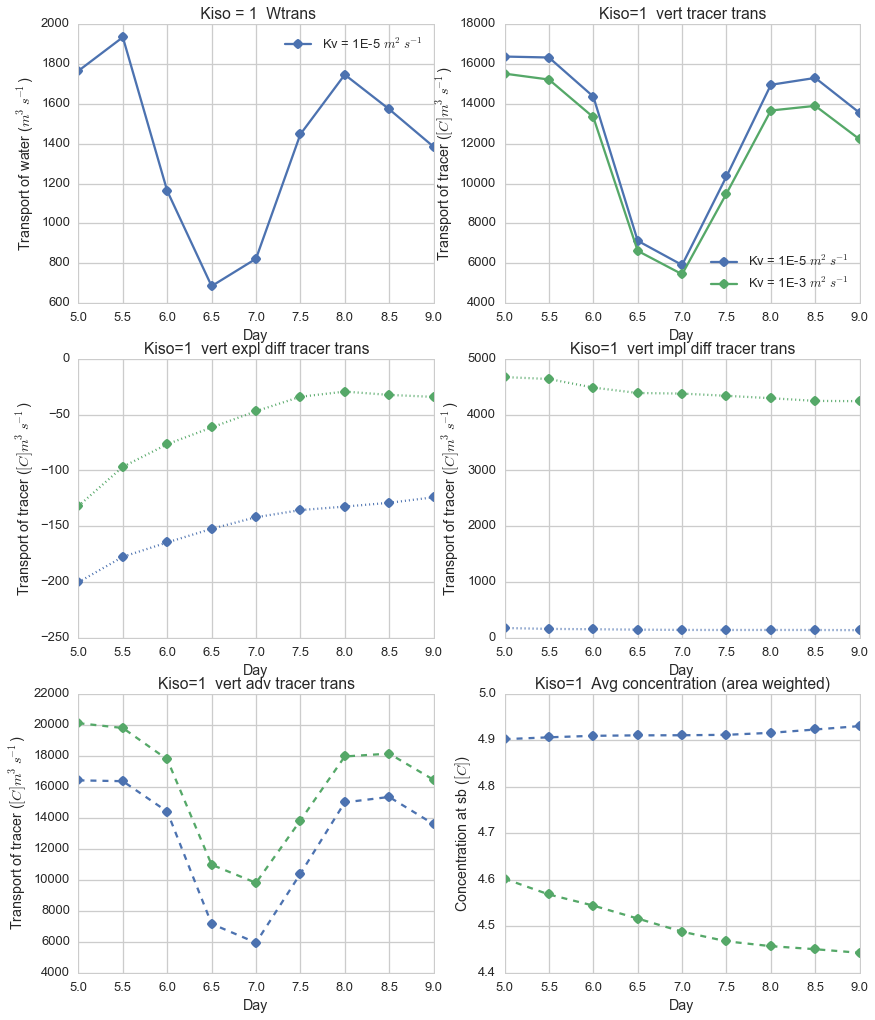

In [29]:
plt.rcParams['contour.negative_linestyle'] = 'solid' # default is to have negative contours with dashed lines
plt.rcParams.update({'font.size':20})
sns.set_style('whitegrid')

zlevel = 30

trac2 = (np.sum(np.sum(Tr1[10:,zlevel,227:267,120:240]*rA[227:267,120:240],axis=2),axis=1))/np.sum(rA[227:267,120:240])
trac3 = (np.sum(np.sum(Tr3[10:,zlevel,227:267,120:240]*rA[227:267,120:240],axis=2),axis=1))/np.sum(rA[227:267,120:240])

W2trans = np.sum(np.sum(WCNT[10:,zlevel,227:267,120:240]*rA[227:267,120:240],axis=2),axis=1)

W2trac = np.sum(np.sum(WTRAC01CNT[9:,zlevel,227:267,120:240]*rA[227:267,120:240],axis=2),axis=1)
W3trac = np.sum(np.sum(WTRAC03CNT[9:,zlevel,227:267,120:240]*rA[227:267,120:240],axis=2),axis=1)

W2diff = np.sum(np.sum(WDIFF01CNT3[9:,zlevel,227:267,120:240],axis=2),axis=1)
W3diff = np.sum(np.sum(WDIFF03CNT3[9:,zlevel,227:267,120:240],axis=2),axis=1)

W2diffi = np.sum(np.sum(WDIFF01CNT3i[9:,zlevel,227:267,120:240],axis=2),axis=1)
W3diffi = np.sum(np.sum(WDIFF03CNT3i[9:,zlevel,227:267,120:240],axis=2),axis=1)

W2adv = np.sum(np.sum(WADV01CNT3[9:,zlevel,227:267,120:240],axis=2),axis=1)
W3adv = np.sum(np.sum(WADV03CNT3[9:,zlevel,227:267,120:240],axis=2),axis=1)

fig,((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3, 2, figsize=(14,17 ))


ax1.plot(np.arange(10,19,1)/2.0,W2trans,'o-',label ='Kv = 1E-5 $m^2s^{-1}$')

ax1.set_aspect('auto')
ax1.set_title(' Kiso = 1  Wtrans')
ax1.set_ylabel('Transport of water ($m^3s^{-1}$)')
ax1.set_xlabel('Day')
ax1.legend( loc=0)    

ax2.plot(np.arange(10,19,1)/2.0,W2trac,'o-',label ='Kv = 1E-5 $m^2s^{-1}$')
ax2.plot(np.arange(10,19,1)/2.0,W3trac,'o-', label = 'Kv = 1E-3 $m^2s^{-1}$')
ax2.set_aspect('auto')
ax2.set_title('Kiso=1  vert tracer trans')
ax2.set_ylabel('Transport of tracer ($[C]m^3s^{-1}$)')
ax2.set_xlabel('Day')
ax2.legend( loc=0)    

ax3.plot(np.arange(10,19,1)/2.0,W2diff,'o:',label ='Kv = 1E-5 $m^2s^{-1}, diff$')
ax3.plot(np.arange(10,19,1)/2.0,W3diff,'o:', label = 'Kv = 1E-3 $m^2s^{-1}, diff$')
ax3.set_aspect('auto')
ax3.set_title('Kiso=1  vert expl diff tracer trans')
ax3.set_ylabel('Transport of tracer ($[C]m^3s^{-1}$)')
ax3.set_xlabel('Day')

ax4.plot(np.arange(10,19,1)/2.0,W2diffi,'o:',label ='Kv = 1E-5 $m^2s^{-1}, diff$')
ax4.plot(np.arange(10,19,1)/2.0,W3diffi,'o:', label = 'Kv = 1E-3 $m^2s^{-1}, diff$')
ax4.set_aspect('auto')
ax4.set_title('Kiso=1  vert impl diff tracer trans')
ax4.set_ylabel('Transport of tracer ($[C]m^3s^{-1}$)')
ax4.set_xlabel('Day')

ax5.plot(np.arange(10,19,1)/2.0,W2adv+W2diff+W2diffi,'o--',label ='Kv = 1E-5 $m^2s^{-1}, adv$')
ax5.plot(np.arange(10,19,1)/2.0,W3adv+W3diff+W3diffi,'o--', label = 'Kv = 1E-3 $m^2s^{-1}, adv$')
ax5.set_aspect('auto')
ax5.set_title('Kiso=1  vert adv tracer trans')
ax5.set_ylabel('Transport of tracer ($[C]m^3s^{-1}$)')
ax5.set_xlabel('Day')

ax6.plot(np.arange(10,19,1)/2.0,trac2,'o--',label ='Kv = 1E-5 $m^2s^{-1}$')
ax6.plot(np.arange(10,19,1)/2.0,trac3,'o--', label = 'Kv = 1E-3 $m^2s^{-1}$')
ax6.set_aspect('auto')
ax6.set_title('Kiso=1  Avg concentration (area weighted)')
ax6.set_ylabel('Concentration at sb ($[C]$)')
ax6.set_xlabel('Day')


plt.show()

#
#fig.savefig('results/figures/verticalTransHoleAdvPhase.eps', format='eps', dpi=1000, bbox_inches='tight')